# Лекция 3. Переобучение. Функции активации. Влияние функций активации на классификацию

Эту лекцию начнем с очень важной темы – переобучения. Что это такое и чем это чревато? Давайте представим, что у нас есть два класса линейно-разделимых образов:

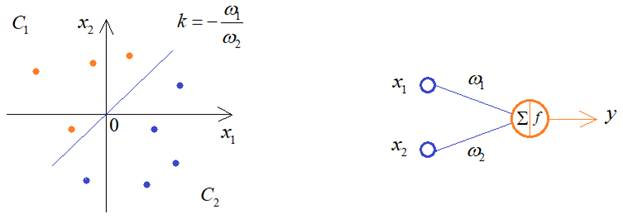

И из предыдущих лекций известно, что для их различения достаточно одного нейрона. Но, что будет, если выбрать сеть с большим числом нейронов, для решения этой же задачи?

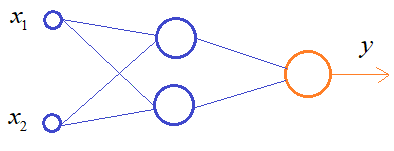

В процессе обучения она способна формировать уже более сложную разделяющую линию, например, провести ее вот так:

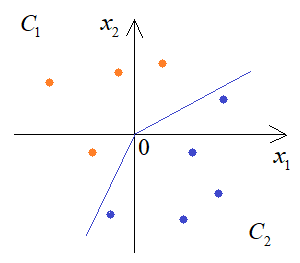

Если продолжать увеличивать число нейронов скрытого слоя, то будем получать все более сложную закономерность разделения двух классов:

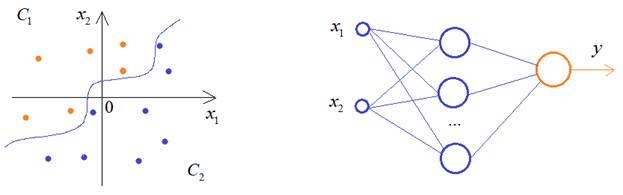

К чему это в итоге приведет? Да, на обучающем множестве все будет отлично, но в процессе эксплуатации такой сети будем получать массу ошибок:

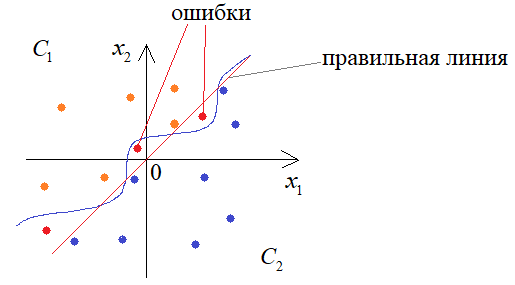

Этот эффект и называется переобучением, когда разделяющая плоскость слишком точно описывает классы из обучающей выборки, и в результате теряется обобщающая способность НС.

Казалось бы, чем больше нейронов в НС, тем качественнее она должна работать. Но на практике имеем обратный эффект: избыток нейронов ухудшает обобщающие способности. В идеале, число нейронов должно быть ровно столько, сколько необходимо для решения поставленной задачи. Но как определить, сколько их нужно? Здесь, опять же, нет универсального алгоритма. Это определяется опытным путем, подбирая минимальное число нейронов, при котором получается приемлемое качество решения задачи.

###Рекомендация обучения №6:

Использовать минимальное необходимое число нейронов в нейронной сети.

Однако, можно контролировать этот эффект в процессе обучения. Для этого обучающая выборка разбивается на два множества: обучающее и валидации (проверочное):

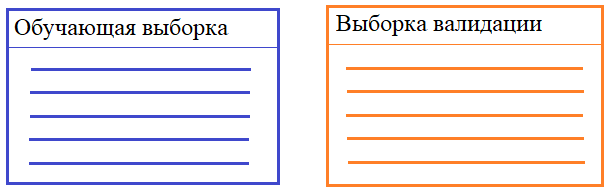

На вход НС подаются наблюдения из обучающей выборки, а, затем, после каждой эпохи, вычисляется критерий качества работы сети для обоих множеств: обучающего и проверочного. Получаем два графика:

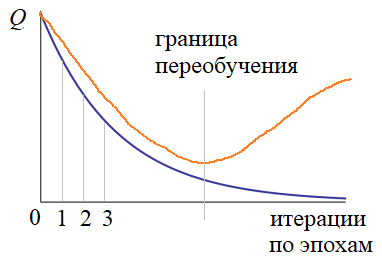

Если с какой-то итерации графики начинают расходиться, то делается вывод, что НС переобучается и процесс обучения следует прервать. В этом случае, лучшие весовые коэффициенты соответствуют границе переобучения.

Здесь у вас может возникнуть вопрос: зачем мы разбиваем обучающую выборку, а не используем в качестве проверочного множества тестовое? Тестовое – это то, на котором как раз и проверяется качество работы сети:

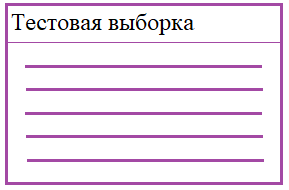

Дело в том, что как только какая-либо выборка прямо или косвенно участвует в обучении, то она влияет на состояние весов НС. В результате выборка валидации тоже, отчасти, становится обучающей и нейросеть подстраивается и под нее. Поэтому для объективной проверки качества необходима третья выборка – тестовая. Отсюда получаем:

###Рекомендация обучения №7:

Разбивать все множество наблюдений на три выборки: обучающую, валидации и тестовую.

Вот такие основные подходы существуют для предотвращения переобучения НС.

###Критерии останова процесса обучения

Рассмотрим критерии останова процесса обучения. Один из них был только что определен:

- Расхождение показателя качества для обучающей выборки и валидации.

Но это лишь один из критериев остановки. Кроме него часто пользуются еще несколькими показателями:

- От итерации к итерации (по всей эпохе) показатель качества Q практически не меняется:

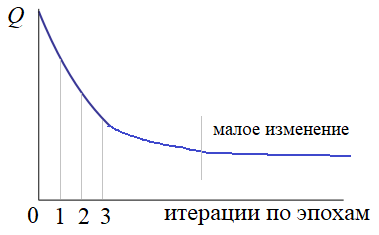

Часто, этот тренд довольно долго продолжается, поэтому процесс лучше прервать и либо переопределить параметры градиентного алгоритма, либо начать заново с другими начальными весами НС.

- Происходит малое изменение весовых коэффициентов. Это может означать, что достигнут некоторый локальный минимум, либо нахождение в области малых градиентов и процесс обучения из-за этого может затянуться. Если этот тренд не прекращается, то лучше прервать обучение и начать заново с другими весами.

- Достигли максимального числа итераций.

#Функции активации и критерии качества работы НС

Продолжаем рассматривать необходимые теоретические моменты построения и обучения НС и следующий важный вопрос – выбор функций активации нейронов. Обычно, они едины для всех нейронов скрытых слоев, исключения могут составлять нейроны выходного слоя. Но, все же, какие функции активации выбирать? На предыдущих лекциях были введены понятия пороговой функции, гиперболического тангенса и логистической функции:

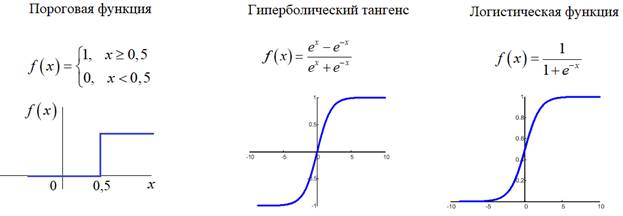

Они вполне работоспособны при небольшом числе скрытых слоев: до 7-8. Кроме первой: она иногда применяется для нейронов выходного слоя в задачах классификации, независимо от числа слоев НС. Но почему гиперболический тангенс и логистическая функция не подходят для больших НС? Это связано, прежде всего, с алгоритмом обучения back propagation. Вспомним, что локальный градиент следующих с конца нейронов вычисляется примерно так:

image.png

Учитывая, что

image.png

получим:

image.png

Отметим следующее из этой формулы:  локальный градиент нейронов следующего слоя вычисляется через произведение двух производных функции активации.Тогда,  максимальное значение производных гиперболического тангенса или логистической функции меньше единицы. Например, для логистической функции:

image.png

но, так как

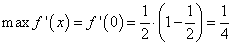

то произведения таких производных образуют затухающую экспоненту:

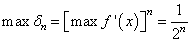

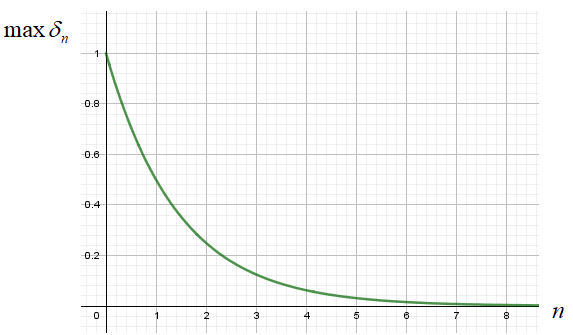

Здесь n можно воспринимать как число слоев в НС и из графика видно, что уже при 8 слоях максимальное значение локального градиента почти равно нулю. Это говорит о том, что весовые коэффициенты будут активно меняться для выходных слоев и почти оставаться неизменными для начальных. То есть, первые слои практически будут отброшены из процесса обучения.

Чтобы решить эту проблему, нужно выбрать функцию, производная которой была бы равна 1.

image.png

Если мы теперь сделаем ограничения по нижнему значению, например, по нулю:

image.png

то получим активационную функцию под названием ReLu:

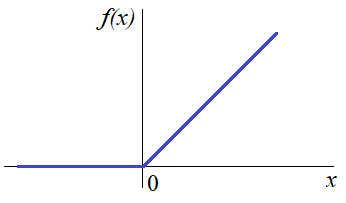

Это одна из самых популярных функций активации на сегодняшний день и, кроме того, не уменьшает локальные градиенты при переходе от слоя к слою. Поэтому часто используется при deep learning – обучении НС с большим числом слоев

### Рекомендация обучения №8:

при малом числе слоев можно использовать гиперболическую и сигмоидальную функции активации или ReLu, при числе слоев от 8 и более – ReLu и ее вариации.

Однако, для выходного слоя функция активация часто меняется и выбирается другой. Например, в задачах регрессии, где нужно получить какое-то числовое значение функции (это может быть прогноз или оценка параметра или еще что-то) используют линейную функцию активации:

                                    linear

которая просто возвращает входную сумму на выходном нейроне сети:

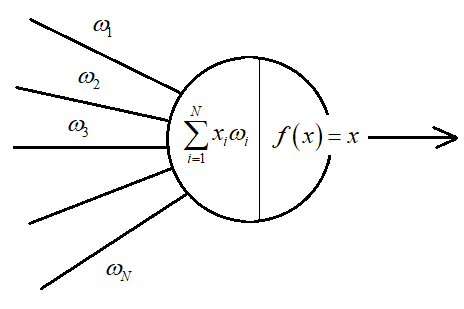

В другом случае, в задачах классификации (например, марок машин) для не пересекающихся классов, выходной слой содержит несколько нейронов, каждый из которых активизируется для своего строго определенного класса:

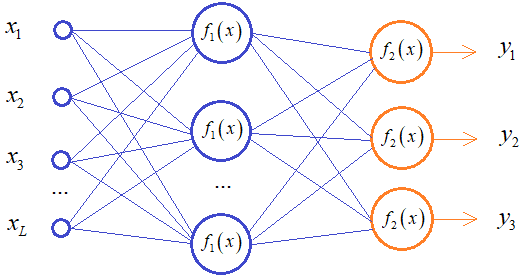

Например:

 - image.png шкода;  

 - image.png тойота;  

 - image.png форд

Предъявляя сети вектор:

image.png

например, для шкоды, мы бы хотели, чтобы выходные значения были равны:

image.png

В этом случае, для каждого входного вектора обучающей выборки, выходные значения также являются вектором:

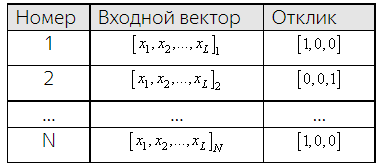

В таких задачах необходимо выходные значения интерпретировать как вероятности соотнесения входного вектора к тому или иному классу, то есть, на выходе получать значения от 0 до 1, которые можно было бы воспринимать как вероятности. Например:

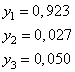

Причем, в сумме они должны давать 1. Очевидно, что необходимо исходить из сумм на каждом выходном нейроне:

image.png

Теперь, чтобы представить эти величины в терминах вероятности, выполняется преобразование:

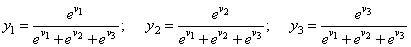

Оно получило название

                                      softmax

В результате, НС нам выдает как бы вероятности определения того или иного класса по значениям входного вектора. Но, все же, это не вероятности в чистом виде – это лишь некоторое приближение, способ интерпретации выходных данных в терминах вероятностей. И чтобы сама сеть корректно могла обучаться при таких выходах, она должна иметь адекватный критерий качества. Здесь хорошо подходит мера, известная как перекрестная энтропия:

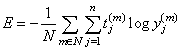

где N – размер обучающей выборки; image.png - требуемые выходы для m-го входного вектора и j-го выхода сети; image.png - реальное значение j-го выхода.

### Рекомендация обучения №9:

для задач регрессии у выходных нейронов использовать линейную (linear) функцию активации, для задач классификации не пересекающихся классов – softmax.

Последнее, что нам необходимо знать для корректной реализации процесса обучения НС – критерии качества.

Как отмечалось, в классическом варианте алгоритма back propagation критерием является минимум средних квадратов ошибок между требуемыми выходными значениями НС и реальными:

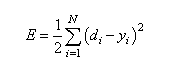

Здесь image.png - требуемые отклики для каждого i-го входного вектора; image.png - получаемый отклик сети, при предъявлении i-го вектора наблюдений. То есть, мы подбираем весовые коэффициенты связей между нейронами так, чтобы минимизировать этот функционал.

Но, как показала практика, этот критерий подходит далеко не для всех задач, где применяются НС и методом проб и ошибок были найдены другие, приводящие к более лучшим результатам. Рассмотрим следующие:

Распознавание:

- хиндж (hinge);

- бинарная кросс-энтропия (binary crossentropy) – при классификации двух классов;

- категориальная кросс-энтропия (categorical crossentropy) – при классификации более двух классов;

Обработка текста:

- логарифмический гиперболический косинус (logcosh);

Задачи регрессии:

- средний квадрат ошибок (mean squared error);

- средний модуль ошибок (mean absolute error);

- средний абсолютный процент ошибок (mean absolute percentage error) – хороша в прогнозировании;

средний квадрат логарифмических ошибок (mean squared logarithmic error).

Сначала рассмотрим критерии для задач регрессии, где выходное значение нейрона представлено в числовой шкале (цены, рост, вес, количества и т. п.). Здесь первый критерий – это классический средний квадрат ошибок:

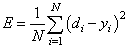

Его недостаток в том, что он образует множество локальных минимумов и часто обучение в них и застревает. Кроме того, этот критерий резко возрастает при появлении больших ошибок, т.к. ошибка возводится в квадрат. Значимые ошибки, как правило, встречаются редко, но если уж появились, то это сильно скажется на критерии качества.

Как вариант, можно воспользоваться средней суммой модулей ошибок (mean absolute error):

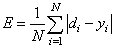

В этом случае большие, редкие ошибки уже не так сильно влияют на величину E. Заметим, что функция модуля не имеет производной в нижней точке. Но, это уже не проблема, численно ее можно определить с некоторыми допущениями. Поэтому такой критерий качества тоже применяется на практике.

Следующий критерий качества средний квадрат логарифмических ошибок (mean squared logarithmic error):

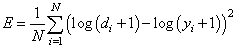

В отличие от обычной суммы квадратов использование логарифмов значительно уменьшает редкие ошибки и они уже не так сильно влияют на величину E. Это еще один способ борьбы с редкими, но значимыми ошибками на выходе НС.

Далее, для задач прогнозирования выполняют нормировку суммы модулей и используют критерий под названием «средний абсолютный процент ошибок» (mean absolute percentage error):

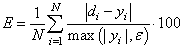

Например, НС выдает абсолютную ошибку 1000. Это много или мало? Здесь важно знать относительно каких величин получается 1000. Если мы оперируем величинами 10 000 000, то 1000 – это ошибка в доли процента. А если используются значения порядка 10 000, то 1000 – это уже ошибка в 10%. Чтобы уйти от абсолютных величин и перевести ошибку в относительные – проценты, как раз и ввели такой критерий качества.

Следующие критерии применяются в задачах классификации (распознавания). Предположим, что НС имеет несколько выходов M, на каждом из которых появляются значения +1 или -1, то есть:

image.png

Здесь в качестве критерия качества можно воспользоваться мерой hinge или square hinge (хиндж):

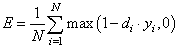

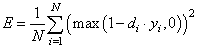

Он работает очевидным образом. Если НС правильно выдает значение, т.е.

image.png

то

image.png

иначе, на выходе будем получать 2:

image.png

Фактически, мы здесь увеличиваем параметр E при каждом несовпадении выхода с заданным значением.

На сегодняшний день в задачах классификации образов при двух классах (например, классификация на мужчин и женщин, собак и кошек и т. п.), широко используется бинарная кросс-энтропия (binary crossentropy):

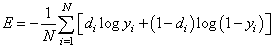

При этом, требуемые выходы отмечаются бинарными значениями: image.png или image.png. Однако, при большем числе классов  уже следует выбирать категориальную кросс-энтропию (categorical crossentropy).

Наконец, считается, что при обработке текста хорошо подходит критерий логарифмический гиперболический косинус (logcosh):

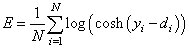

Величина image.png близка к image.png при малых x и примерно равна image.png - при больших x.

Это лишь некоторые часто используемые на практике критерии качества работы НС.

# Keras

На одной из прошлых лекций по back propagation, были прописаны вручную алгоритм обучения и структура сети. Но, это не лучший путь. Особенно, когда сеть становится большой, а критериев качества и методов оптимизации большое количество. Гораздо проще воспользоваться одним из пакетов по разработке и обучению нейросетей. Благо, что на сегодняшний день их масса. Вот диаграмма популярности таких фреймворков, взятая из официальной документации по Keras:

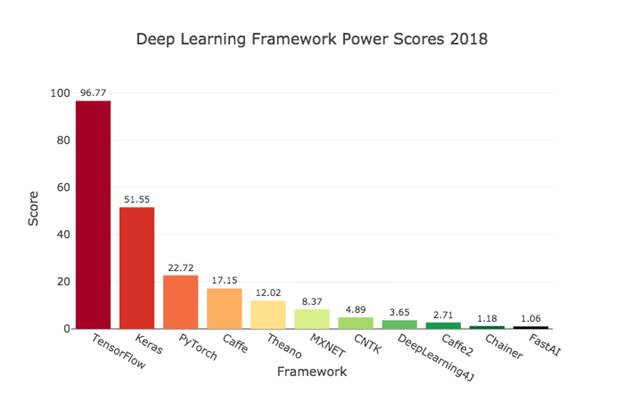

Как видим, по состоянию на 2018 год лидером является TensorFlow, разработанный компанией Google, специально для создания сетей самой разной структуры. Кроме того, TensorFlow позволяет проводить обучение на графических процессорах (GPU), компьютеров объединенных в сеть. Это значительно повышает скорость работы алгоритмов. Но TensorFlow – относительно низкоуровневый фреймворк. Как раз другие фреймворки из диаграммы и являются, своего рода, такими языками. Они значительно упрощают процесс проектирования нейросетей. И, в частности, один из самых популярных пакетов Keras является некой надстройкой, оболочкой над TensorFlow:

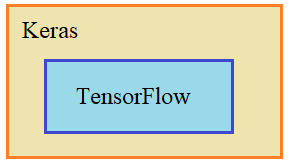

То есть, используя API Keras, мы в действительности создаем нейросеть на TensorFlow, но делаем это гораздо быстрее. Кроме того, API Keras является официальным фронтендом TensorFlow и мы можем им воспользоваться, просто установив TensorFlow.


## Пример построения сети на Keras

Итак, теперь, когда мы с вами разобрались с установкой Keras, давайте воспользуемся его API для построения и обучения простой НС. Возьмем следующий пример: перевод градусов Цельсия в градусы Фаренгейта. Общая формула, такая:

image.png

Это один из примеров задачи регрессии, когда на выходе сети формируется числовое значение, в данном случае – градусы по Фаренгейту. Итак, для такого преобразования достаточно взять следующую нейросеть с линейной функцией активацией:

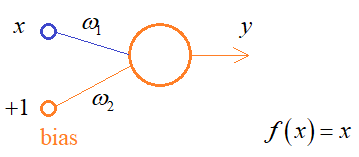

Выходное значение будет формироваться как:

image.png

Очевидно, что в рамках нашей задачи:

image.png

Построим такую простейшую сеть и выполним ее обучение. Сначала импортируем необходимые модули:

import numpy as np

import matplotlib.pyplot as plt

from tensorflow import keras

from tensorflow.keras.layers import Dense

Далее, в качестве обучающего множества будем использовать два списка:

c = np.array([-40, -10, 0, 8, 15, 22, 38])

f = np.array([-40, 14, 32, 46, 59, 72, 100])

И, затем, определим модель НС, как последовательную, т.е. состоящую из слоев, идущих друг за другом.

model = keras.Sequential()

Добавим в эту модель слой нейронов, состоящий из одного нашего выходного нейрона, имеющий ровно один вход и линейную активационную функцию:

model.add(Dense(units=1, input_shape=(1,), activation='linear'))

Здесь units=1 означает один нейрон, а input_shape=(1,) – один вход. Конструктор Dense формирует полносвязный слой, то есть, все входы будут связаны со всеми нейронами данного слоя. В нашем простейшем случае – это связь  и дополнительно, автоматически, для каждого нейрона добавляется смещение – bias.

Теперь, когда структура НС определена, ее нужно скомпилировать, указав критерий качества и способ оптимизации алгоритма градиентного спуска. В рамках данной задачи мы выберем минимум среднего квадрата ошибки и оптимизацию по Adam:

model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1))

Что еще происходит на этапе компиляции? Сеть автоматически инициализируется начальными значениями весов связей. Так, что теперь она полностью готова к этапу обучения.

Для запуска обучения используется метод fit:

log = model.fit(c, f, epochs=500, verbose=False)

Здесь передается обучающая выборка для входных и выходных значений, затем, число эпох, т.е. выборка будет пропущена через сеть 500 раз и на каждой итерации будут корректироваться весовые коэффициенты и вычисляться значение критерия качества. Последний параметр указывает не отображать в консоли текущую информацию при обучении сети. Мы ее выведем после, используя объект log:

plt.plot(log.history['loss'])

plt.grid(True)

plt.show()

Здесь идет обращение к истории, берутся значения критерия качества (функции потерь – loss function) и отображаются в виде графика.

По идее, все, наша сеть сформирована, обучена и давайте посмотрим как это все будет работать. После запуска программы увидим следующий график:

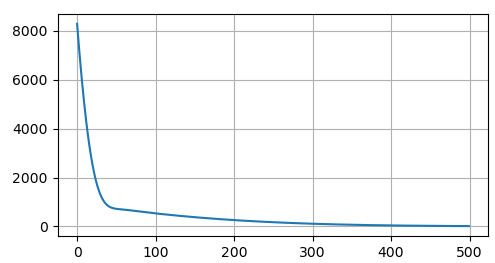

То есть, наш критерий качества уже на 400-й эпохе практически перестал уменьшаться. Хорошо, теперь было бы интересно узнать как работает сеть и какие весовые коэффициенты были найдены. Чтобы подать на вход произвольное значение, нужно воспользоваться методом predict:

print(model.predict([100]))

Он возвратит выходное значение и мы его отобразим в консоли. А для отображения весовых коэффициентов, запишем метод get_weights:

print(model.get_weights())

Снова запустим программу и в консоли увидим строчки:

[[211.27545]]

[array([[1.8292068]], dtype=float32), array([28.35477], dtype=float32)]

Нейросеть перевела 100 градусов Цельсия в 211 градусов по Фаренгейту, что близко к истине:

image.png

А весовые коэффициенты были определены как 1,8 и 28 – также близко к требуемым величинам.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [3]:
c = np.array([-40, -10, 0, 8, 15, 22, 38])
f = np.array([-40, 14, 32, 46, 59, 72, 100])

In [10]:
model = keras.Sequential()
model.add(Dense(units=1, input_shape=(1,), activation='linear'))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1))

log = model.fit(c, f, epochs=1000, verbose=False)



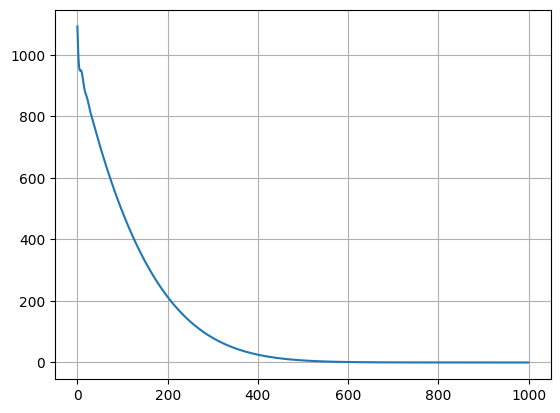

In [5]:
plt.plot(log.history['loss'])
plt.grid(True)
plt.show()

In [11]:
model.predict([100])

1/1 [==============================] - 0s 56ms/step


array([[211.74359]], dtype=float32)

In [12]:
model.get_weights()

[array([[1.7981685]], dtype=float32), array([31.926735], dtype=float32)]

#MNIST

 Обучим еще раз сеть, которая будет распознавать рукописные цифры.

from tensorflow.keras.datasets import mnist

А, затем, загрузим данные:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Здесь 60 000 изображений в обучающей выборке и 10 000 – в тестовой.

x_train – изображения цифр обучающей выборки;

y_train – вектор соответствующих значений цифр (например, если на i-м изображении нарисована 5, то  y_train[i] = 5);

x_test – изображения цифр тестовой выборки;

y_test – вектор соответствующих значений цифр для тестовой выборки.

Каждое изображение имеет размер 28х28 пикселей и представлено в градациях серого, т.е. каждый пиксел имеет значение от 0 до 255 (0 – черный цвет, 255 – белый):

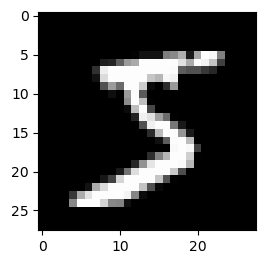

Выведем первые 25 изображений из этой базы:

# отображение первых 25 изображений из обучающей выборки

plt.figure(figsize=(10,5))

for i in range(25):

    plt.subplot(5,5,i+1)

    plt.xticks([])

    plt.yticks([])

    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

Видим самые разные цифры с произвольным написанием. Все их НС должна научиться правильно распознавать.

Структура сети. Структура выбирается самим разработчиком исходя из его представлений о решении этой задачи. Общий ориентир здесь такой: для распознавания графических образов хорошо себя показали сверточные НС. Но, так как разговора о них пока еще не было, поэтому воспользуемся обычной полносвязной НС с:

- 28 x 28 = 784 входами;

- 128 нейронами скрытого слоя;

- 10 нейронами выходного слоя.

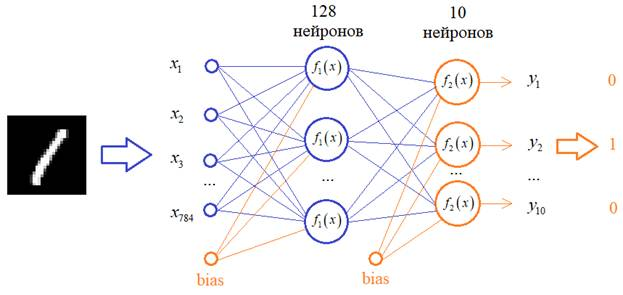

В качестве функций активации скрытого слоя выберем популярную на сегодняшний день ReLu, а у выходных нейронов – softmax, т.к. необходимо интерпретировать выходные значения в терминах вероятности принадлежности к тому или иному классу цифр.

Для примера, в скрытом слое можно взять 100 нейронов или 50 или построить сеть с двумя скрытыми слоями и так далее.

Реализуем эту сеть. Первый слой должен преобразовывать изображение 28x28 пикселей в вектор из 784 элементов. Для такой операции в Keras можно создать слой специального вида – Flatten и в нашем случае мы его пропишем так:

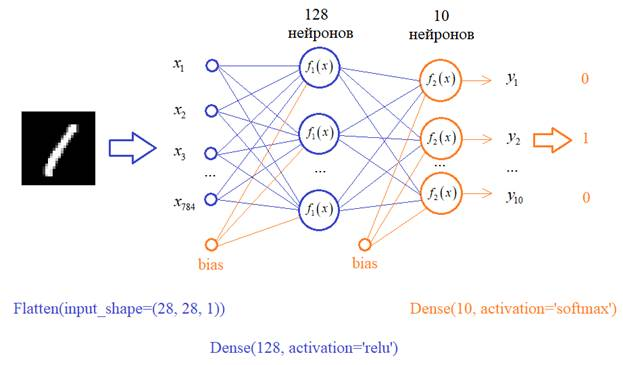

Следующий слой создадим с помощью уже известного нам класса Dense, который свяжет все 784 входа со всеми 128 нейронами. И такой же последний слой из 10 нейронов, который будет связан со всеми 128 нейронами предыдущего слоя. Итоговую модель в Keras можно записать так:

model = keras.Sequential([

    Flatten(input_shape=(28, 28, 1)),

    Dense(128, activation='relu'),

    Dense(10, activation='softmax')

])

print(model.summary())     # вывод структуры НС в консоль

Все, структура сети определена, обучающий набор изображений имеется. Теперь входные значения вектора x стандартизируем так, чтобы они находились в диапазоне от 0 до 1:

x_train = x_train / 255

x_test = x_test / 255

Здесь каждое значение тензоров x_train и x_test будет делиться на максимальное число 255, которое они могут принимать. На выходе получим вещественные величины от 0 до 1.

Еще необходимо подготовить правильный формат выходных значений. Опять же, для каждого изображения цифры вектор y_train содержит число:

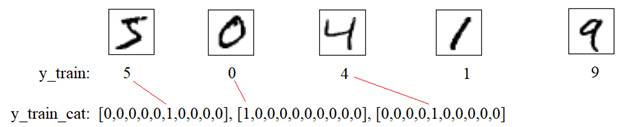

А на выходе нужен вектор с 1 на месте соответствующего числа, т.к. НС имеет 10 выходов, и каждый выход будет соответствовать определенной цифре: от 0 до 9.

Так как это типовое преобразование, то в Keras уже имеется функция, которая все это делает. Нам достаточно записать строчки:

y_train_cat = keras.utils.to_categorical(y_train, 10)

y_test_cat = keras.utils.to_categorical(y_test, 10)

чтобы получить наборы векторов y_train_cat и y_test_cat по заданному формату. Здесь второй параметр 10 – это размерность каждого вектора.

Теперь выберем функцию потерь (loss function) и способ оптимизации градиентного алгоритма.

model.compile(optimizer='adam',

loss='categorical_crossentropy',

metrics=['accuracy'])

Все, на данном этапе, сеть подготовлена и данные для запуска процесса обучения. Запишем команду:

model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.2)
и здесь появились новые параметры:

batch_size = 32 – это размер батча (32 картинки), после которых будет выполняться корректировка весов

validation_split = 0,2 – разбиение обучающей выборки на собственно обучающую и проверочную. Значение 0,2 определяет, что для каждой эпохи 20% случайных картинок из обучающей выборки будут помещаться в выборку валидации. 20% - это довольно частое значение для создания проверочной выборки (ее, как правило, выбирают из диапазона от 10% до 30%).

model.evaluate(x_test, y_test_cat)

Метод evaluate прогоняет все тестовое множество и вычисляет значение критерия качества и метрики.

Кроме того, выполним распознавания какого-либо тестового изображения:

n = 1

x = np.expand_dims(x_test[n], axis=0)

res = model.predict(x)

print( res )

Здес, сначала выделяется из тензора n-е изображение и, затем, прогоняется его по сети, используя метод predict. На выходе получим 10 значений, по которым, затем, нужно будет определить правильность классификации цифр. Запустим эту программу и видим вектор выходных значений:

[[3.2027703e-05 4.2498193e-04 9.9881822e-01 4.3836111e-04 1.3467245e-09
8.7383814e-05 1.2201114e-04 1.4552125e-09 7.6896657e-05 4.7233226e-09]]

И полагаем, что максимальное значение как раз и будет соответствовать нужному классу. В данном случае – это число 9.9881822e-01 третьего выхода, то есть, для цифры 2. Чтобы было проще воспринимать выходную информацию, будем выводить номер максимального числа из этого вектора. Для этого воспользуемся функцией argmax модуля numpy:

print( np.argmax(res) )

И, еще, отобразим на экране это тестовое изображение:

plt.imshow(x_test[n], cmap=plt.cm.binary)

plt.show()


Теперь выделим и посмотрим на неверные результаты распознавания. Пропустим через НС всю тестовую выборку и векторы выходных значений преобразуем в числа от 0 до 9:

pred = model.predict(x_test)

pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])

print(y_test[:20])

Затем, сформируем маску, которая будет содержать True для верных вариантов и False – для неверных. И с помощью этой маски выделим из тестовой выборки все неверные результаты:

mask = pred == y_test

print(mask[:10])

x_false = x_test[~mask]

y_false = x_test[~mask]

print(x_false.shape)

И выведем первые 5 из них на экран:

for i in range(5):
  print("Значение сети: "+str(y_test[i]))
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()

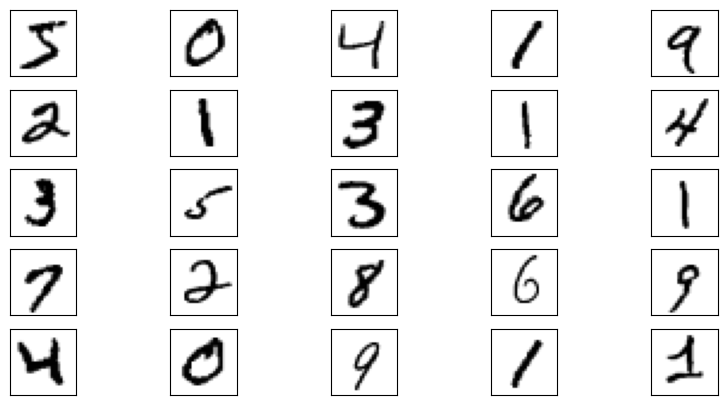

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3814 - accuracy: 0.8863 - val_loss: 0.2350 - val_accuracy: 0.9311
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2055 - accuracy: 0.9394 - val_loss: 0.1631 - val_accu

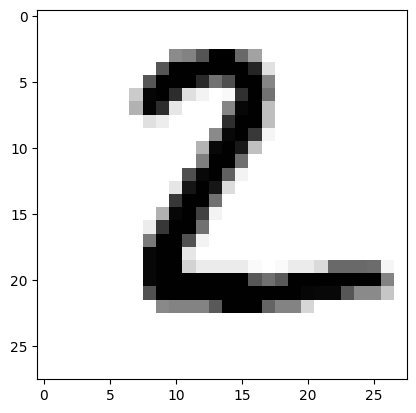

313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[ True  True  True  True  True  True  True  True False  True]
(324, 28, 28)


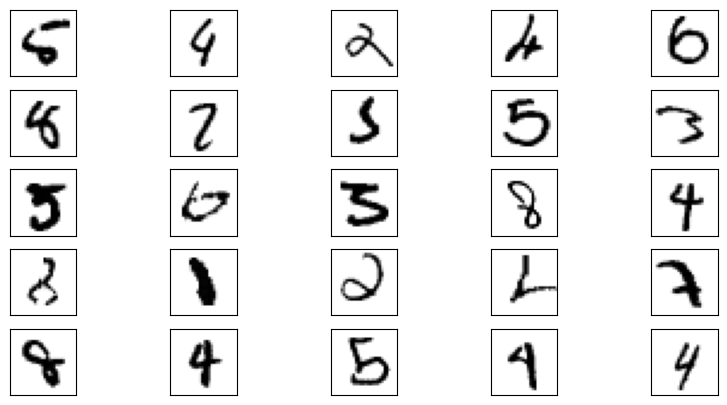

In [14]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# нормализация входных данных
x_train = x_train / 255 - 0.5
x_test = x_test / 255 - 0.5

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())      # вывод структуры НС в консоль

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

model.evaluate(x_test, y_test_cat)

n = 1
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( np.argmax(res) )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)

# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()

# Влияние функций активации на классификацию

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import random as python_random

In [16]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])

def classification_visualisation(xx, yy, classes):
  classes = classes.reshape(xx.shape)
  plt.figure()
  plt.pcolormesh(xx, yy, classes, cmap=cmap_light)
  plt.show()


def seed_random(seed=123):
  # The below is necessary for starting Numpy generated random numbers
  # in a well-defined initial state.
  np.random.seed(123)

  # The below is necessary for starting core Python generated random numbers
  # in a well-defined state.
  python_random.seed(123)

  # The below set_seed() will make random number generation
  # in the TensorFlow backend have a well-defined initial state.
  # For further details, see:
  # https://www.tensorflow.org/api_docs/python/tf/random/set_seed
  tf.random.set_seed(1234)

In [17]:
# создание обучающих данных
x1, x2 = np.meshgrid(np.linspace(-2, 2, 100),
                     np.linspace(-2, 2, 100))
train_X = np.c_[x1.ravel(), x2.ravel()]
train_y = train_X[:, 1] > np.sin(train_X [:, 0]*6)

In [18]:
train_X.shape, train_y.shape

((10000, 2), (10000,))

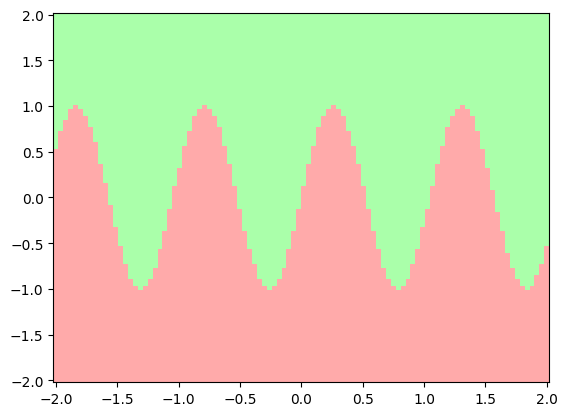

In [19]:
classification_visualisation(x1, x2, train_y)

создаем какую-нибудь модель

In [20]:
def model_experiment(model, seed=123):
  seed_random(seed)
  model.compile(loss='mse', optimizer='Adam')
  model.fit(train_X, train_y, epochs=50, batch_size=512, verbose=0)
  classification_visualisation(x1, x2, model.predict(train_X))

313/313 [==============================] - 0s 1ms/step


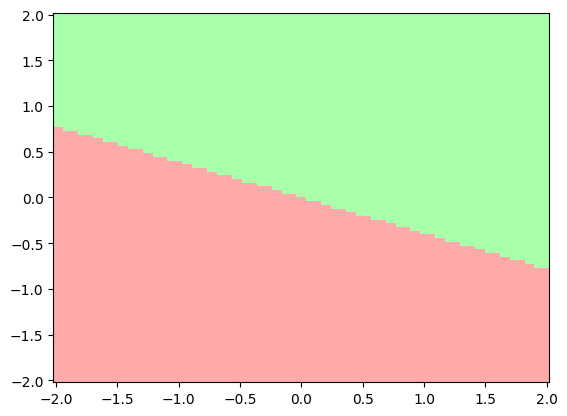

In [21]:
model = Sequential([
  Dense(1, activation='sigmoid', input_shape=(2,))
])

model_experiment(model)

313/313 [==============================] - 1s 2ms/step


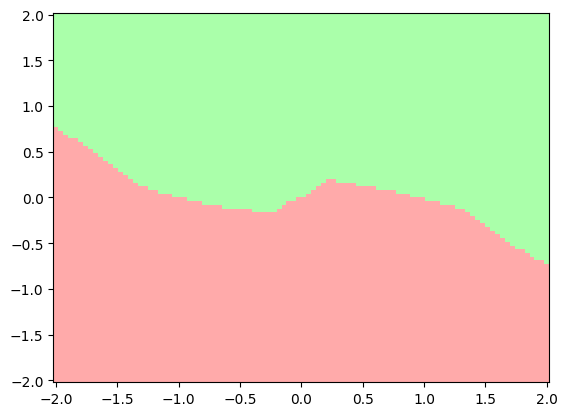

In [22]:
model = Sequential([
  Dense(500, activation='relu', input_shape=(2,)),
  Dense(1, activation='sigmoid')
])

model_experiment(model)

313/313 [==============================] - 1s 2ms/step


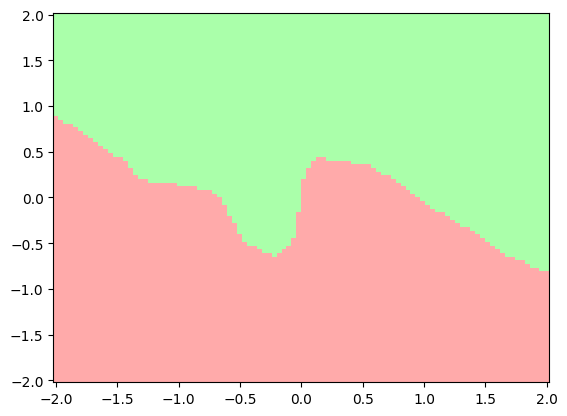

In [23]:
model = Sequential([
  Dense(5, activation='relu', input_shape=(2,)),
  Dense(20, activation='relu'),
  Dense(20, activation='relu'),
  Dense(20, activation='relu'),
  Dense(1, activation='sigmoid')
])

model_experiment(model)

313/313 [==============================] - 1s 2ms/step


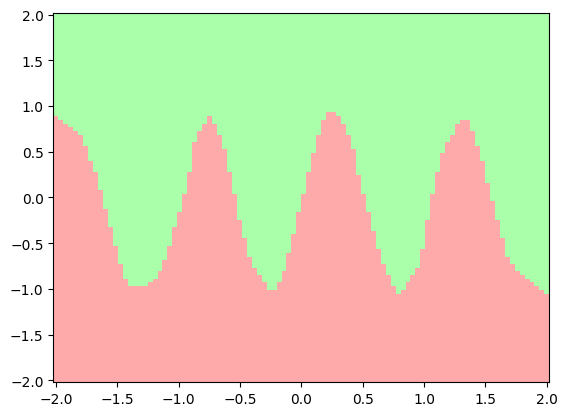

In [24]:
model = Sequential([
  Dense(5, activation='relu', input_shape=(2,)),
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dense(1, activation='sigmoid')
])

model_experiment(model)

313/313 [==============================] - 1s 2ms/step


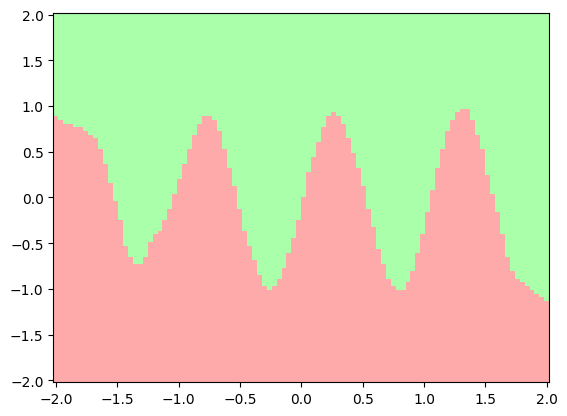

In [25]:
model = Sequential([
  Dense(5, activation='leaky_relu', input_shape=(2,)),
  Dense(100, activation='leaky_relu'),
  Dense(500, activation='leaky_relu'),
  Dense(1000, activation='leaky_relu'),
  Dense(1, activation='sigmoid')
])

model_experiment(model)

313/313 [==============================] - 1s 2ms/step


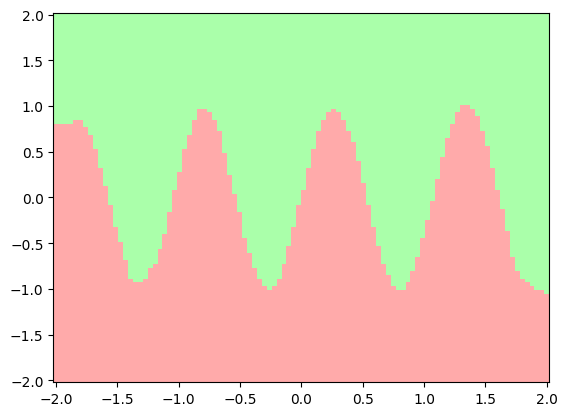

In [26]:
model = Sequential([
  Dense(5, activation='relu', input_shape=(2,)),
  Dense(500, activation='relu'),
  Dense(500, activation='relu'),
  Dense(500, activation='relu'),
  Dense(500, activation='relu'),
  Dense(1, activation='sigmoid')
])

model_experiment(model)

https://playground.tensorflow.org

# Fashion mnist

In [27]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.15.0


## Данные

In [28]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [29]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [30]:
print(train_images.shape, len(train_labels), train_labels, sep='\n')

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


In [31]:
print(test_images.shape, len(test_labels), test_labels, sep='\n')


(10000, 28, 28)
10000
[9 2 1 ... 8 1 5]


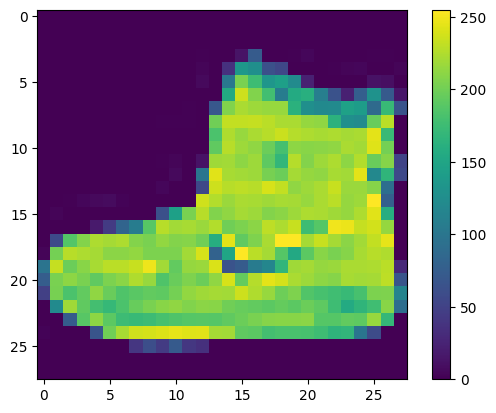

In [32]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [33]:
train_images = train_images / 255.0

test_images = test_images / 255.0


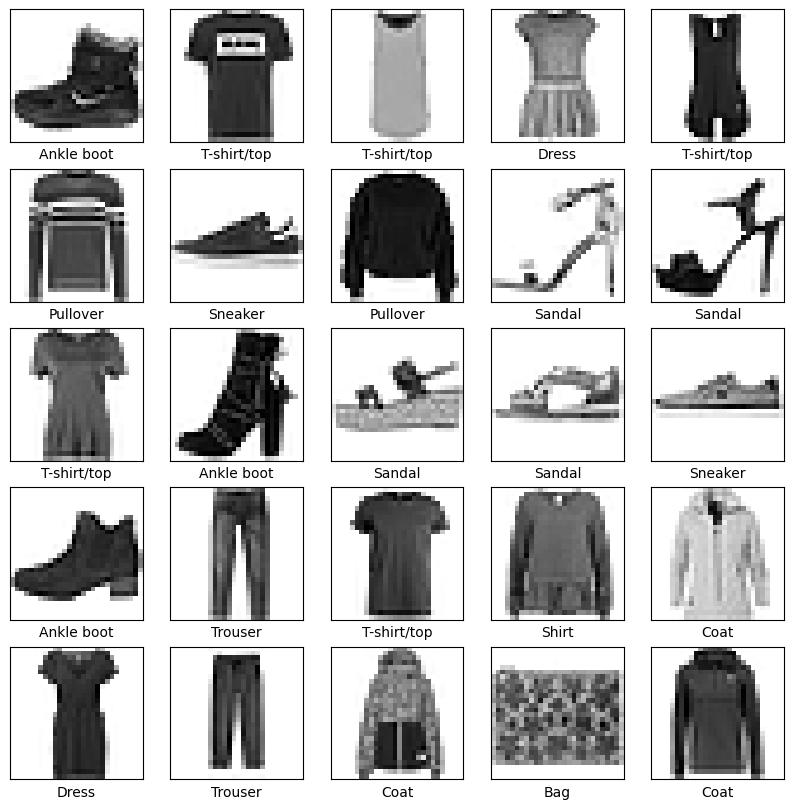

In [34]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Обучение

In [65]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [66]:
hstr = model.fit(train_images, train_labels, epochs=3, verbose=2)

Epoch 1/3
1875/1875 - 4s - loss: 1.7796 - accuracy: 0.3337 - 4s/epoch - 2ms/step
Epoch 2/3
1875/1875 - 4s - loss: 1.7569 - accuracy: 0.3202 - 4s/epoch - 2ms/step
Epoch 3/3
1875/1875 - 4s - loss: 1.7359 - accuracy: 0.3223 - 4s/epoch - 2ms/step


In [67]:
hstr.params

{'verbose': 2, 'epochs': 3, 'steps': 1875}

In [41]:
hstr.history

{'loss': [0.49448806047439575, 0.37320223450660706, 0.334989070892334],
 'accuracy': [0.8272666931152344, 0.8661333322525024, 0.8776000142097473]}

In [42]:
hstr.model

In [43]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 128)               100480    
                                                                 
 dense_39 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


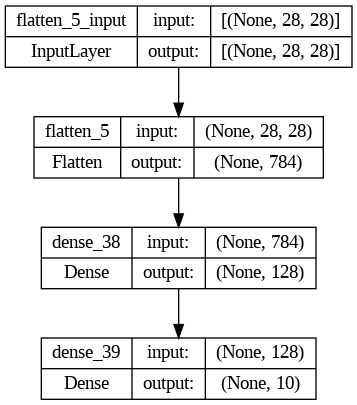

In [45]:
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

## Результаты

In [46]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [68]:
model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


array([[-1.8511406e+02, -7.6704239e+01, -1.4728677e+02, ...,
         1.0014399e+01, -1.0831040e+01,  8.9281635e+00],
       [ 6.1061233e-01, -6.6345739e-01,  6.6013849e-01, ...,
        -4.5957923e+00,  7.7368003e-01, -6.8757689e-01],
       [ 2.5021124e+02,  8.7817877e+02, -1.9872314e+02, ...,
        -3.9318268e+02, -3.2009158e+02, -5.9205750e+02],
       ...,
       [ 6.1061233e-01, -6.6345739e-01,  6.6013849e-01, ...,
        -4.5957923e+00,  7.7368003e-01, -6.8757689e-01],
       [ 1.0558352e+01,  3.4362476e+01, -7.2862082e+00, ...,
        -2.0082779e+01, -1.2014287e+01, -2.4256407e+01],
       [-1.2426089e+02, -5.1789276e+01, -9.8811577e+01, ...,
         5.2273316e+00, -7.0287232e+00,  5.7775416e+00]], dtype=float32)

In [69]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [52]:
print(predictions[0],
      np.argmax(predictions[0]),
      test_labels[0],
      sep='\n')

[6.3787879e-06 2.3750032e-07 2.3344289e-06 9.4963536e-07 1.4879301e-06
 2.0714231e-01 4.0996924e-06 9.6978530e-02 2.0641698e-04 6.9565725e-01]
9
9


## Визуализация

In [61]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 18ms/step
[[5.7563248e-05 4.0912447e-09 9.8888737e-01 4.3307868e-09 7.7030850e-03
  1.5378651e-08 3.3514730e-03 2.1164882e-11 4.7468643e-07 7.6565497e-14]]


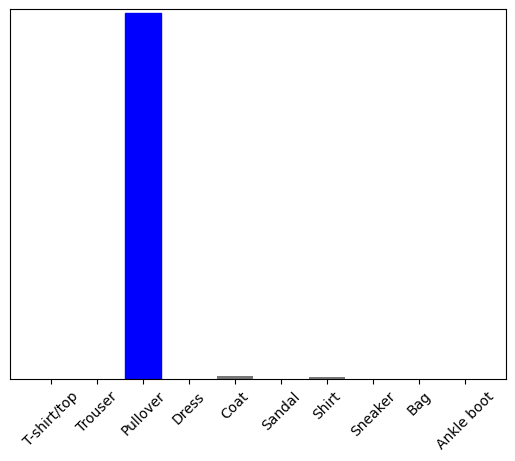

In [62]:
img = test_images[1]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = probability_model.predict(img)

print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

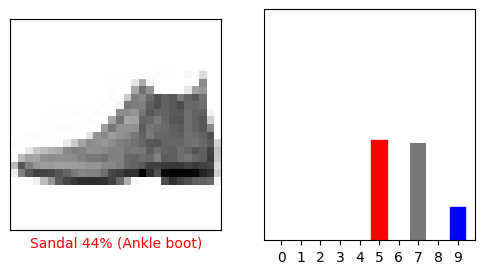

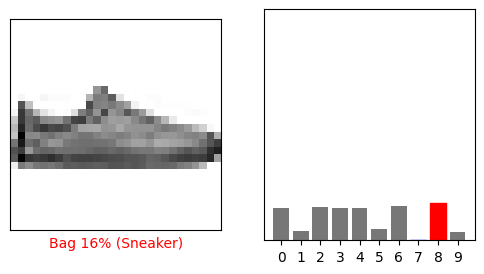

In [70]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


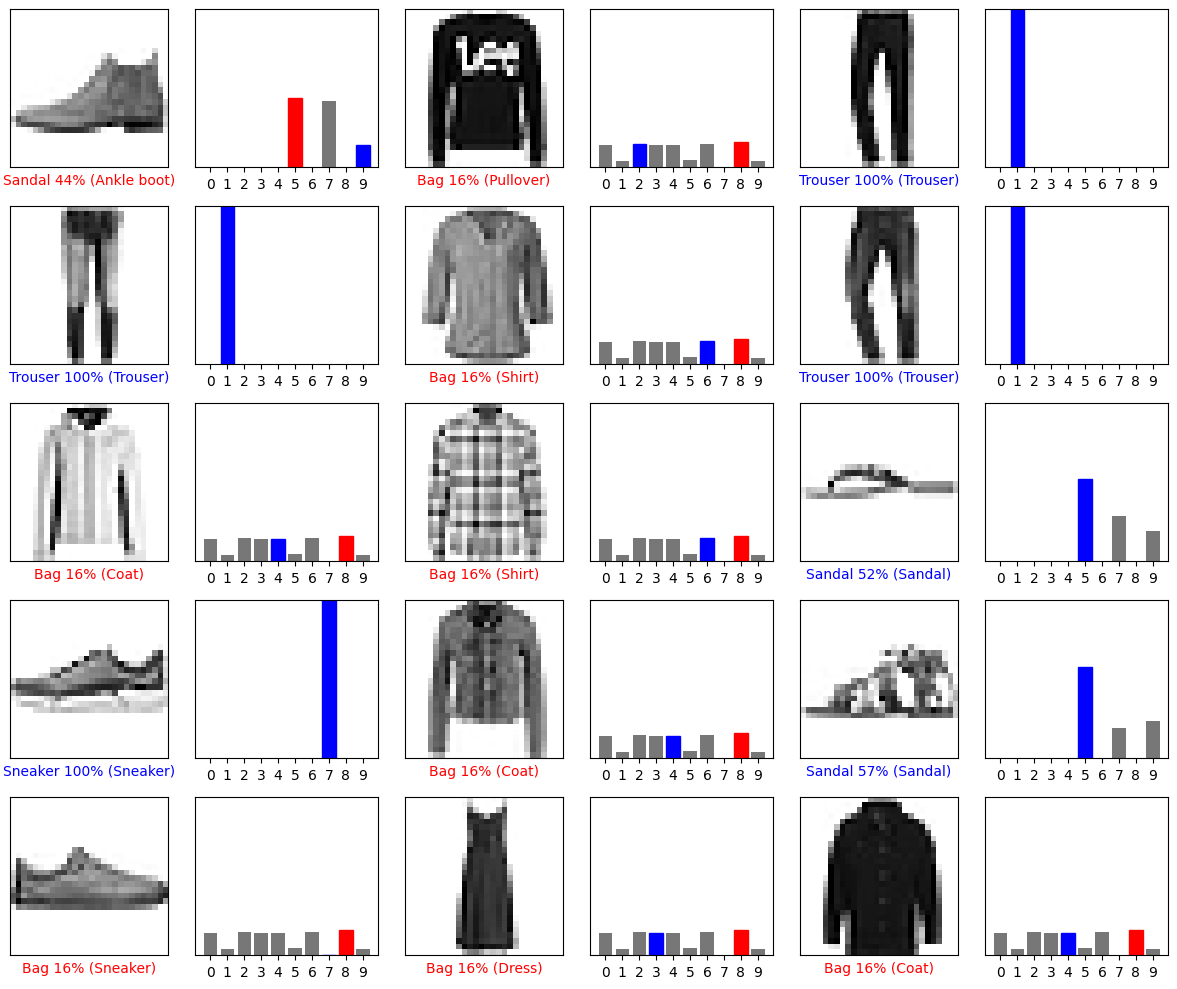

In [71]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


# Датасет с винами

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [ ]:
data = load_wine()

In [ ]:
list(data.target_names)

In [ ]:
data.feature_names

In [ ]:
data.data.shape, data.target.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, shuffle=True, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Датасет с рукописными буквами

https://www.tensorflow.org/datasets/catalog/binary_alpha_digits

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
print(classes)

X = np.load('/content/drive/My Drive/Colab Notebooks/Программное обеспечение интеллектуальных систем/lection_3/binary_alpha_digits_images.npy')
y = np.load('/content/drive/My Drive/Colab Notebooks/Программное обеспечение интеллектуальных систем/lection_3/binary_alpha_digits_labels.npy')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [ ]:
X.shape, y.shape

((1404, 20, 16), (1404,))

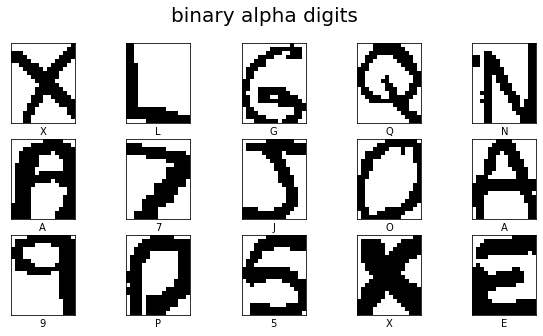

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
fig.suptitle('binary alpha digits', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(X[n], cmap=plt.cm.binary)
    ax.set_xlabel(classes[y[n]])
    n += 1